https://app.datacamp.com/learn/competitions/xmas-movies/workspace/w/93db4ad8-1fb4-4420-83c0-9d947dee8ea2/edit?showExploreMore=false

# Predicting Christmas Movie Grossings

## 📖 Background

Imagine harnessing the power of data science to unveil the hidden potential of movies before they even hit the silver screen! As a data scientist at a forward-thinking cinema, you're at the forefront of an exhilarating challenge: crafting a cutting-edge system that doesn't just predict movie revenues, but reshapes the entire landscape of cinema profitability. This isn't just about numbers; it's about blending art with analytics to revolutionize how movies are marketed, chosen, and celebrated.

Your mission? To architect a predictive model that dives deep into the essence of a movie - from its title and running time to its genre, captivating description, and star-studded cast. And what better way to sprinkle some festive magic on this project than by focusing on a dataset brimming with Christmas movies? A highly-anticipated Christmas movie is due to launch soon, but the cinema has some doubts. It wants you to predict its success, so it can decide whether to go ahead with the screening or not. It's a unique opportunity to blend the cheer of the holiday season with the rigor of data science, creating insights that could guide the success of tomorrow's blockbusters. Ready to embark on this cinematic adventure?



## 💾 The data

We're providing you with a dataset of 788 Christmas movies, with the following columns:

* `christmas_movies.csv`

| Variable       | Description                                                             |
|----------------|-------------------------------------------------------------------------|
| `title`        | the title of the movie                                                  |
| `release_year` | year the movie was released                                             |
| `description`  | short description of the movie                                          |
| `type`         | the type of production e.g. Movie, TV Episode                           |
| `rating`       | the rating/certificate e.g. PG                                           |
| `runtime`      | the movie runtime in minutes                                            |
| `imdb_rating`  | the IMDB rating                                                         |
| `genre`        | list of genres e.g. Comedy, Drama etc.                                  |
| `director`     | the director of the movie                                               |
| `stars`        | list of actors in the movie                                             |
| `gross`        | the domestic gross of the movie in US dollars (what we want to predict) |

You may also use an additional dataset of 1000 high-rated movies, with the following columns:

* `imdb_top1k.csv`

| Variable       | Description                                                             |
|----------------|-------------------------------------------------------------------------|
| `title`        | the title of the movie                                                  |
| `release_year` | year the movie was released                                             |
| `description`  | short description of the movie                                          |
| `type`         | the type of production e.g. Movie, TV Episode                           |
| `rating`       | the ratig/certificate e.g. PG                                           |
| `runtime`      | the movie runtime in minutes                                            |
| `imdb_rating`  | the IMDB rating                                                         |
| `genre`        | list of genres e.g. Comedy, Drama etc.                                  |
| `director`     | the director of the movie                                               |
| `stars`        | list of actors in the movie                                             |
| `gross`        | the domestic gross of the movie in US dollars (what we want to predict) |

Finally you have access to a dataset of movie production budgets for over 6,000 movies, with the following columns:

* `movie_budgets.csv`

| Variable            | Meaning                         |
|---------------------|---------------------------------|
| `year`              | year the movie was released     |
| `date`              | date the movie was released     |
| `title`             | title of the movie              |
| `production budget` | production budget in US dollars |


**Note: while you may augment the Christmas movies with the general movie data, the model should be developed to predict ratings of Christmas movies only.**

In [12]:
import pandas as pd
xmas_movies = pd.read_csv('data/christmas_movies.csv')
xmas_movies

,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",$59.70M
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",$71.32M
2,Spirited,2022.0,A musical version of Charles Dickens's story o...,Movie,PG-13,127.0,6.6,"Comedy, Family, Musical",Sean Anders,"Will Ferrell, Ryan Reynolds, Octavia Spencer, ...",NaN
3,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",$285.76M
4,How the Grinch Stole Christmas,2000.0,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",$260.04M
...,...,...,...,...,...,...,...,...,...,...,...
783,Heston's Fantastical Food: Heston's Fantastica...,2012.0,Add a Plot,TV Episode,NaN,NaN,NaN,Documentary,Jay Taylor,"Heston Blumenthal, George Hill, Marc Meltonvil...",NaN
784,Cosmic Cowboys: Céréal Christmas,2004.0,Add a Plot,TV Episode,NaN,NaN,NaN,Animation,NaN,NaN,NaN
785,Proper Manors: Christmas Special: Christmas Pa...,2012.0,Miles Barnes is forced to throw contractually-...,TV Episode,NaN,20.0,NaN,"Action, Comedy, Crime",Dallin Boyce,"Brandyn Cross, Peter D'Alessio, Janis Race-Big...",NaN
786,Being Millennialish: A Very Millennial Christm...,2015.0,Add a Plot,TV Episode,NaN,NaN,NaN,NaN,Leslie Delery,NaN,NaN


In [3]:
top1k_movies = pd.read_csv('data/imdb_top1k.csv')
top1k_movies

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,"30,500,000"
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,NaN


In [4]:
movie_budgets = pd.read_csv('data/movie_budgets.csv')
movie_budgets

,year,date,title,production budget
0,2022.0,"Dec 9, 2022",Avatar: The Way of Water,460000000
1,2019.0,"Apr 23, 2019",Avengers: Endgame,400000000
2,2011.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000
3,2015.0,"Apr 22, 2015",Avengers: Age of Ultron,365000000
4,2023.0,"May 17, 2023",Fast X,340000000
...,...,...,...,...
6435,1999.0,"Apr 2, 1999",Following,6000
6436,2005.0,"Jul 13, 2005",Return to the Land of Wonders,5000
6437,2015.0,"Sep 29, 2015",A Plague So Pleasant,1400
6438,2005.0,"Aug 5, 2005",My Date With Drew,1100


## 💪 Competition challenge

Create a report that covers the following:
1. Exploratory data analysis of the dataset with informative plots. It's up to you what to include here! Some ideas could include:
    * Analysis of the genres
    * Descriptive statistics and histograms of the grossings
    * Word clouds
2. Develop a model to predict the movie's domestic gross based on the available features.
     * Remember to preprocess and clean the data first.
     * Think about what features you could define (feature engineering), e.g.:
       * _number of times a director appeared in the top 1000 movies list_,
       * _highest grossing for lead actor(s)_,
       * _decade released_
3. Evaluate your model using appropriate metrics.
4. Explain some of the limitations of the models you have developed. What other data might help improve the model?
5. Use your model to predict the grossing of the following fictitious Christmas movie:

**Title**: The Magic of Bellmonte Lane

**Description**:
"The Magic of Bellmonte Lane" is a heartwarming tale set in the charming town of Bellmonte, where Christmas isn't just a holiday, but a season of magic. The story follows Emily, who inherits her grandmother's mystical bookshop. There, she discovers an enchanted book that grants Christmas wishes. As Emily helps the townspeople, she fights to save the shop from a corporate developer, rediscovering the true spirit of Christmas along the way. This family-friendly film blends romance, fantasy, and holiday cheer in a story about community, hope, and magic.

**Director**: Greta Gerwig

**Cast**:
- Emma Thompson as Emily, a kind-hearted and curious woman
- Ian McKellen as Mr. Grayson, the stern corporate developer
- Tom Hanks as George, the wise and elderly owner of the local cafe
- Zoe Saldana as Sarah, Emily's supportive best friend
- Jacob Tremblay as Timmy, a young boy with a special Christmas wish

**Runtime**: 105 minutes

**Genres**: Family, Fantasy, Romance, Holiday

**Production budget**: $25M



## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!

In [2]:
import pandas as pd

In [9]:
# Load the uploaded datasets
xmas_movies = pd.read_csv(r"C:\Users\Rubén\Desktop\Movie Grossing Data Camp Competition\-Predicting-Christmas-Movie-Grossings\data\raw\christmas_movies.csv")
top1k_movies = pd.read_csv(r"C:\Users\Rubén\Desktop\Movie Grossing Data Camp Competition\-Predicting-Christmas-Movie-Grossings\data\raw\imdb_top1k.csv")
movie_budgets = pd.read_csv(r"C:\Users\Rubén\Desktop\Movie Grossing Data Camp Competition\-Predicting-Christmas-Movie-Grossings\data\raw\movie_budgets.csv")

# Display the first few rows of each dataset for a quick overview
xmas_movies.head(), top1k_movies.head(), movie_budgets.head()


(                                   title  release_year  \
 0                          Love Actually        2003.0   
 1  National Lampoon's Christmas Vacation        1989.0   
 2                               Spirited        2022.0   
 3                             Home Alone        1990.0   
 4         How the Grinch Stole Christmas        2000.0   
 
                                          description   type rating  runtime  \
 0  Follows the lives of eight very different coup...  Movie      R    135.0   
 1  The Griswold family's plans for a big family C...  Movie  PG-13     97.0   
 2  A musical version of Charles Dickens's story o...  Movie  PG-13    127.0   
 3  An eight-year-old troublemaker, mistakenly lef...  Movie     PG    103.0   
 4  On the outskirts of Whoville lives a green, re...  Movie     PG    104.0   
 
    imdb_rating                    genre             director  \
 0          7.6   Comedy, Drama, Romance       Richard Curtis   
 1          7.5                 

EDA

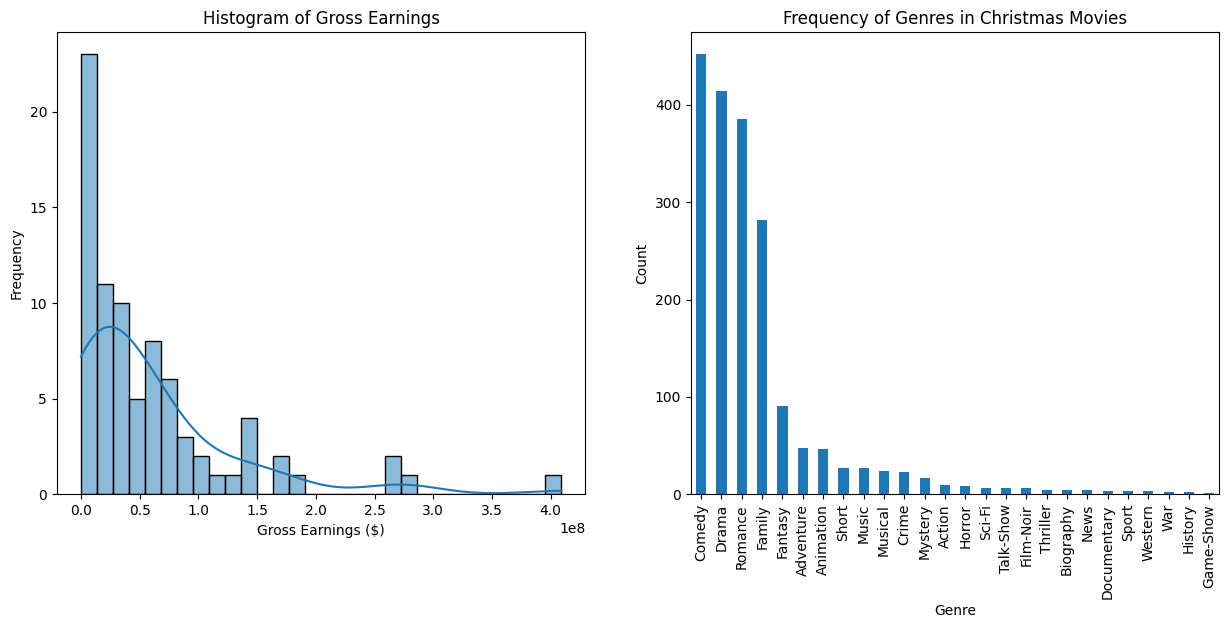

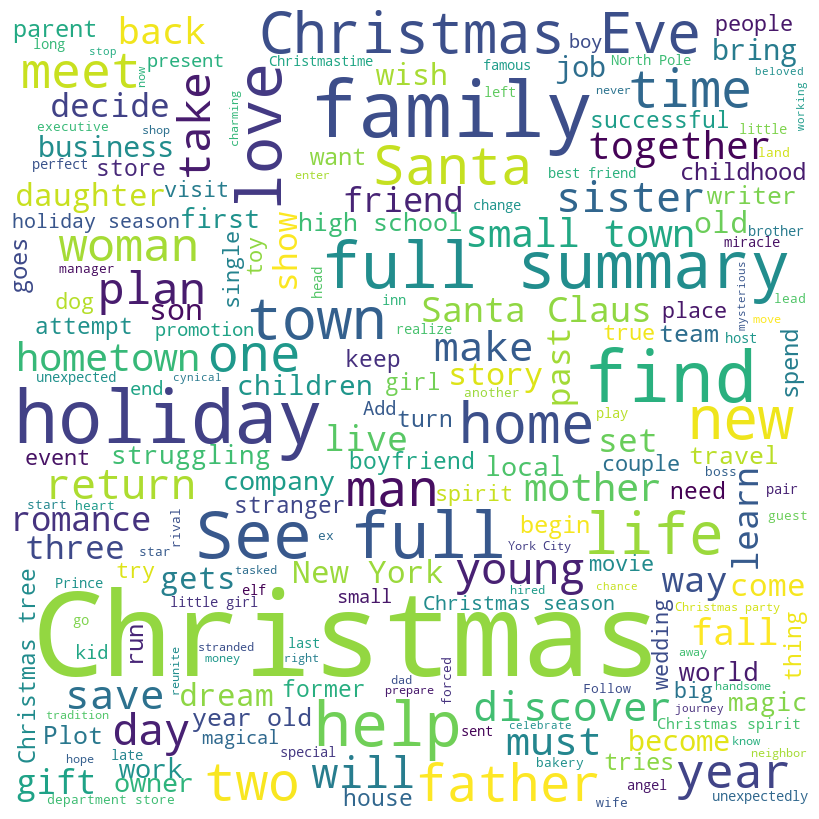

(       release_year     runtime  imdb_rating         gross
 count     780.00000  749.000000   749.000000  8.100000e+01
 mean     2008.20000   86.491322     6.113218  5.956111e+07
 std        20.51565   19.235773     0.973869  7.392150e+07
 min      1898.00000    1.000000     1.300000  1.000000e+04
 25%      2008.00000   84.000000     5.600000  1.166000e+07
 50%      2016.00000   87.000000     6.200000  3.503000e+07
 75%      2020.00000   92.000000     6.600000  7.211000e+07
 max      2023.00000  199.000000     9.200000  4.090100e+08,
 Comedy         452
 Drama          414
 Romance        385
 Family         282
 Fantasy         91
 Adventure       47
 Animation       46
 Short           27
 Music           27
 Musical         24
 Crime           23
 Mystery         17
 Action           9
 Horror           8
 Sci-Fi           6
 Talk-Show        6
 Film-Noir        6
 Thriller         4
 Biography        4
 News             4
 Documentary      3
 Sport            3
 Western          3

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# EDA: Christmas Movies Dataset

# Convert 'gross' to numerical values
xmas_movies['gross'] = xmas_movies['gross'].replace('[\$,M]', '', regex=True).astype(float) * 1_000_000

# Descriptive statistics for numerical features
numerical_stats = xmas_movies.describe()

# Genre analysis
genre_counts = xmas_movies['genre'].str.split(', ', expand=True).stack().value_counts()

# Word Cloud for Movie Descriptions
description_text = " ".join(description for description in xmas_movies.description)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(description_text)

# Plotting
plt.figure(figsize=(15, 6))

# Histogram of Gross Earnings
plt.subplot(1, 2, 1)
sns.histplot(xmas_movies['gross'], bins=30, kde=True)
plt.title('Histogram of Gross Earnings')
plt.xlabel('Gross Earnings ($)')
plt.ylabel('Frequency')

# Bar Chart for Genre Counts
plt.subplot(1, 2, 2)
genre_counts.plot(kind='bar')
plt.title('Frequency of Genres in Christmas Movies')
plt.xlabel('Genre')
plt.ylabel('Count')

# Word Cloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 

plt.show()

numerical_stats, genre_counts



Exploratory Data Analysis (EDA) Summary

Descriptive Statistics:

Release Year: The Christmas movies span from 1898 to 2023, with a mean release year around 2008.
Runtime: The average runtime of these movies is approximately 86 minutes.
IMDb Rating: On average, the movies have an IMDb rating of 6.1.
Gross Earnings: The gross earnings vary significantly, with a mean of around $59.56 million. However, this data is available for only 81 movies.

Genre Analysis:

The most common genres in Christmas movies are Comedy, Drama, and Romance.
Family and Fantasy also appear frequently.

Histogram of Gross Earnings:

The distribution of gross earnings shows that most Christmas movies have gross earnings below $100 million.
There are a few outliers with exceptionally high gross.

Word Cloud of Movie Descriptions:

Common themes in movie descriptions include family, Christmas, love, and holiday.

Featuring Engineering

In [11]:
# Feature Engineering

# Creating a feature for the number of times a director appeared in the top 1000 movies list
director_counts = top1k_movies['Director'].value_counts()
xmas_movies['top1k_director_count'] = xmas_movies['director'].map(director_counts).fillna(0)

# Creating a feature for the highest grossing of lead actors
# Splitting stars into individual actors and melting them into a single column
xmas_stars = xmas_movies['stars'].str.split(', ', expand=True)
xmas_stars_melted = xmas_stars.melt(value_name='actor').drop('variable', axis=1).dropna()

# Mapping each actor to their highest grossing film in the top 1000 movies
actor_max_gross = top1k_movies[['Star1', 'Star2', 'Star3', 'Star4', 'Gross']].melt(id_vars='Gross', value_name='actor').drop('variable', axis=1)
actor_max_gross['Gross'] = actor_max_gross['Gross'].replace('[\$,]', '', regex=True).astype(float)
actor_max_gross = actor_max_gross.groupby('actor')['Gross'].max()

xmas_stars_melted['max_gross'] = xmas_stars_melted['actor'].map(actor_max_gross)
xmas_movies['highest_grossing_actor'] = xmas_stars_melted.groupby(xmas_stars_melted.index // 5)['max_gross'].max().fillna(0)

# Creating a feature for the decade released
xmas_movies['decade'] = (xmas_movies['release_year'] // 10 * 10).astype('category')

# Merging movie budgets into the dataset
xmas_movies = xmas_movies.merge(movie_budgets[['title', 'production budget']], how='left', on='title')
xmas_movies.rename(columns={'production budget': 'production_budget'}, inplace=True)

# Check the first few rows with new features
xmas_movies.head()



,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross,top1k_director_count,highest_grossing_actor,decade,production_budget
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",59700000.0,1.0,285761243.0,2000.0,45000000.0
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",71320000.0,0.0,293506292.0,1980.0,NaN
2,Spirited,2022.0,A musical version of Charles Dickens's story o...,Movie,PG-13,127.0,6.6,"Comedy, Family, Musical",Sean Anders,"Will Ferrell, Ryan Reynolds, Octavia Spencer, ...",NaN,0.0,434038008.0,2020.0,NaN
3,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",285760000.0,2.0,434038008.0,1990.0,15000000.0
4,How the Grinch Stole Christmas,2000.0,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",260040000.0,5.0,534858444.0,2000.0,123000000.0


Explicación detallada de cada paso

director_counts:

Este paso crea una Serie llamada director_counts que contiene la cuenta de cuántas veces cada director ha aparecido en la lista de las 1000 mejores películas (top1k_movies). Proporciona información sobre la frecuencia con la que un director ha tenido películas populares en la lista.
xmas_movies['top1k_director_count']:

Esta línea agrega una nueva columna llamada top1k_director_count al DataFrame xmas_movies. Esta columna muestra la cantidad de veces que el director de cada película navideña en xmas_movies ha aparecido en la lista de las 1000 mejores películas. Ayuda a relacionar la película de Navidad con la popularidad y el historial del director.
xmas_stars:

Aquí se divide la columna stars del DataFrame xmas_movies, que probablemente contiene los nombres de los actores separados por comas, en columnas separadas. Esto crea un nuevo DataFrame llamado xmas_stars, donde cada columna representa un actor en el elenco de la película de Navidad.
xmas_stars_melted:

Este paso "derrite" (melt) el DataFrame xmas_stars, lo que significa que transforma las columnas de actores en una única columna llamada actor. Esto facilita el análisis posterior al tener una columna de actores que se puede utilizar de manera más eficiente.
actor_max_gross:

Se crea un nuevo DataFrame que combina la información de las películas principales (top1k_movies) y los ingresos brutos de las películas. Luego, se calcula el ingreso bruto máximo para cada actor y se crea una Serie llamada actor_max_gross que contiene estos valores máximos.
xmas_stars_melted['max_gross']:

En esta línea, se mapea el ingreso bruto máximo de cada actor en el DataFrame xmas_stars_melted, lo que significa que se agrega la información del ingreso bruto máximo correspondiente a cada actor.
xmas_movies['highest_grossing_actor']:

Se crea una nueva columna llamada highest_grossing_actor en el DataFrame xmas_movies. Esta columna muestra el ingreso bruto máximo entre los actores de cada película de Navidad, lo que puede ser relevante para evaluar el atractivo de una película en función de su elenco.
xmas_movies['decade']:

Se agrega una nueva columna llamada decade al DataFrame xmas_movies. Esta columna representa la década en la que se lanzó cada película de Navidad, lo que puede ser útil para el análisis temporal.
xmas_movies = xmas_movies.merge(...):

Realiza una fusión (merge) entre el DataFrame xmas_movies y el DataFrame movie_budgets utilizando el título de la película como clave de unión. Esto agrega información sobre el presupuesto de producción de las películas a xmas_movies, lo que permite analizar la relación entre el presupuesto y el rendimiento de las películas de Navidad.
xmas_movies.rename(...):

Renombra la columna 'production budget' a 'production_budget' en el DataFrame xmas_movies para hacer que el nombre sea más consistente y legible.
xmas_movies.head():

Finalmente, muestra las primeras filas del DataFrame xmas_movies con las nuevas características creadas para verificar los resultados de la ingeniería de características.